In [15]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
import os

## Calculate Camera Intrinsics

In [ ]:
"""
Define the number of vertical and horizontal corners of chessboard image
"""
nb_vertical = 7
nb_horizontal = 7

In [16]:
images = sorted(glob(os.path.join(os.getcwd(), 
                                  "calibration_pics", 
                                  "*.jpg")))
assert images


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    """
    Implement findChessboardCorners here
    ret, corners = ...
    """
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread(images[0])
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## Save Camera Matrix Intrinsics

In [99]:
import pandas as pd

data = pd.DataFrame(newcameramtx)
data.to_string("cam_intrinsics.txt", index=False, header=False)

In [63]:
cam_intrinsics = pd.read_csv("cam_intrinsics.txt", delim_whitespace=True, header=None) 
cam_intrinsics = cam_intrinsics.to_numpy()
cam_intrinsics

array([[1.36795947e+03, 0.00000000e+00, 9.94070802e+02],
       [0.00000000e+00, 1.36699243e+03, 4.93415746e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [70]:
mtx

array([[1.37186406e+03, 0.00000000e+00, 9.93981229e+02],
       [0.00000000e+00, 1.37274609e+03, 4.92100625e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Text(0.5, 1.0, 'Undistorted image')

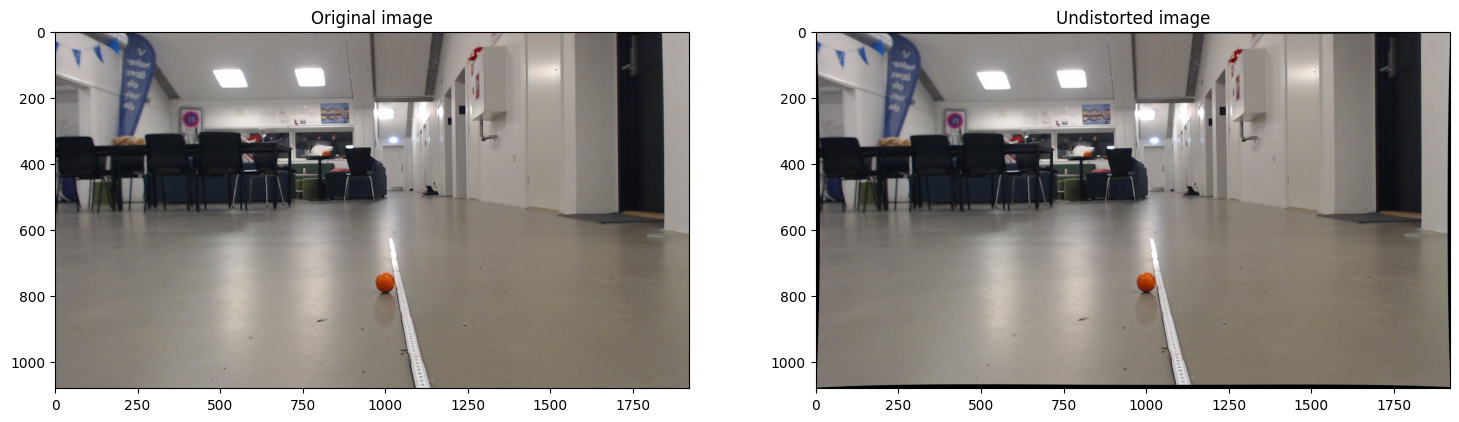

In [100]:
# undistort
img = cv2.imread("test_measurement.jpg")
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

In [101]:
cv2.imwrite("undistorted_test_measurement.jpg", dst)

True

In [103]:
dst.shape

(1080, 1920, 3)

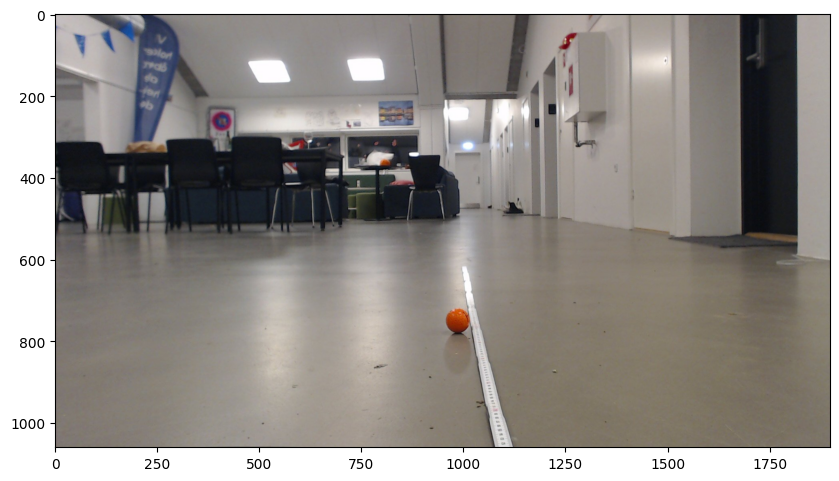

In [89]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst[...,[2,1,0]])

In [96]:
dst.shape

(1060, 1898, 3)

In [97]:
cv2.imwrite("undistorted_test_measurement.jpg", dst)

True

In [92]:
1060/2, 1898/2

(530.0, 949.0)